In [37]:
import pandas as pd

data = pd.read_csv('./bank.csv', na_values=[' ', '', '-'])

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surname             4897 non-null   object 
 1   CreditScore         4898 non-null   int64  
 2   Geography           4896 non-null   object 
 3   Gender              4898 non-null   object 
 4   Age                 4895 non-null   float64
 5   Tenure              4898 non-null   int64  
 6   Balance             4898 non-null   float64
 7   NumOfProducts       4898 non-null   int64  
 8   HasCrCard           4898 non-null   int64  
 9   IsActiveMember      4898 non-null   int64  
 10  EstimatedSalary     4898 non-null   float64
 11  Exited              4898 non-null   int64  
 12  Satisfaction.Score  4898 non-null   int64  
 13  Card.Type           4898 non-null   object 
 14  Point.Earned        4898 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 574.1+

In [39]:
data['Stayed'] = ~data['Exited']
data.drop(columns='Exited', inplace=True)

In [40]:
data = data[data['Age'] <= 87].reset_index(drop=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surname             4893 non-null   object 
 1   CreditScore         4894 non-null   int64  
 2   Geography           4892 non-null   object 
 3   Gender              4894 non-null   object 
 4   Age                 4894 non-null   float64
 5   Tenure              4894 non-null   int64  
 6   Balance             4894 non-null   float64
 7   NumOfProducts       4894 non-null   int64  
 8   HasCrCard           4894 non-null   int64  
 9   IsActiveMember      4894 non-null   int64  
 10  EstimatedSalary     4894 non-null   float64
 11  Satisfaction.Score  4894 non-null   int64  
 12  Card.Type           4894 non-null   object 
 13  Point.Earned        4894 non-null   int64  
 14  Stayed              4894 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 573.6+

In [42]:
data.drop(columns='Surname', inplace=True)

In [43]:
data = data.loc[data['Geography'].isna() == False]
data = data.loc[data['Geography'].isna() == False]

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4892 entries, 0 to 4893
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         4892 non-null   int64  
 1   Geography           4892 non-null   object 
 2   Gender              4892 non-null   object 
 3   Age                 4892 non-null   float64
 4   Tenure              4892 non-null   int64  
 5   Balance             4892 non-null   float64
 6   NumOfProducts       4892 non-null   int64  
 7   HasCrCard           4892 non-null   int64  
 8   IsActiveMember      4892 non-null   int64  
 9   EstimatedSalary     4892 non-null   float64
 10  Satisfaction.Score  4892 non-null   int64  
 11  Card.Type           4892 non-null   object 
 12  Point.Earned        4892 non-null   int64  
 13  Stayed              4892 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 573.3+ KB


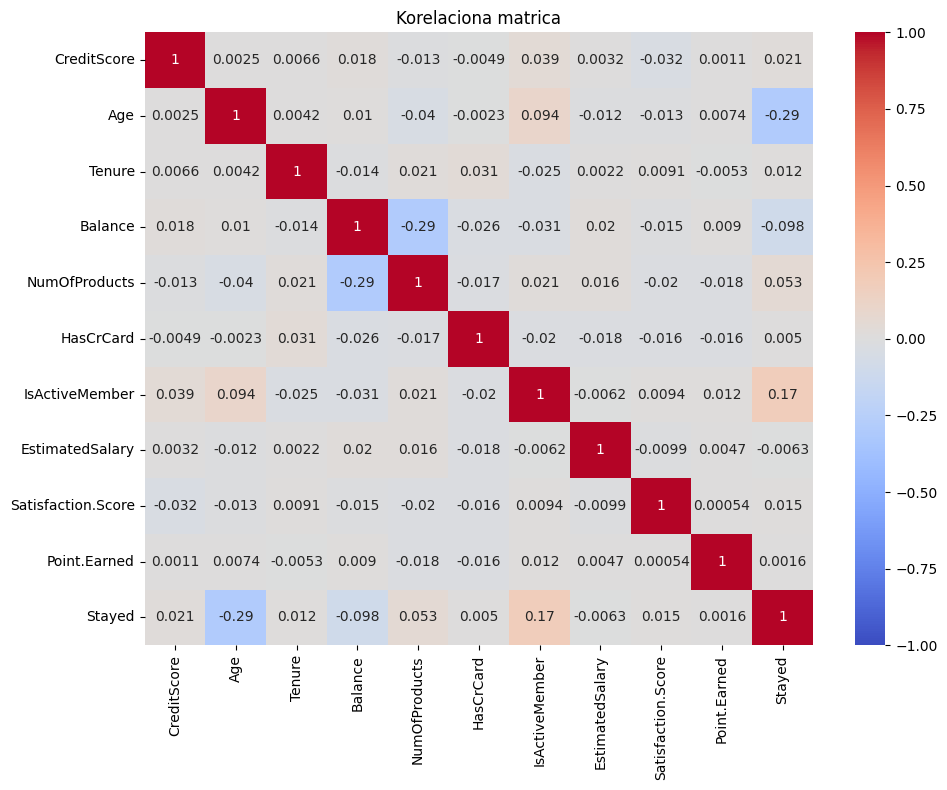

In [45]:
import matplotlib.pyplot as plt
import seaborn as sb

corr_matrix = data.corr(numeric_only=True).round(2)
plt.figure(figsize=(10, 8))
sb.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelaciona matrica")
plt.tight_layout()
plt.show()

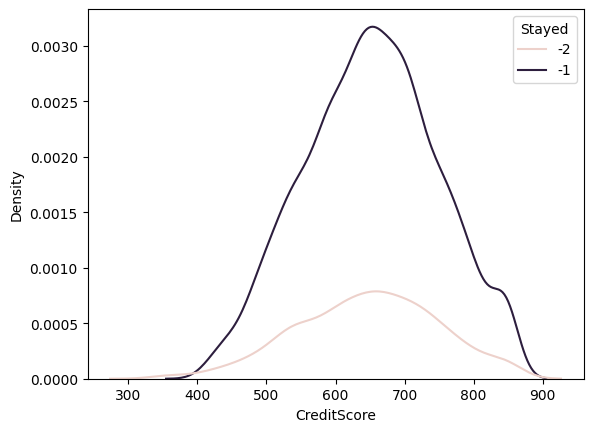

In [46]:
import seaborn as sns

sns.kdeplot(data=data, x='CreditScore', hue='Stayed')
plt.show()

#Ne treba zadržati CreditScore jer se raspodele za varijablu Stayed (Yes/No) gotovo potpuno preklapaju i atribut ne doprinosi razdvajanju klasa.
data.drop(columns=['CreditScore'], inplace=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

X = data.drop(columns='Stayed')
y = data['Stayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Vizualizacija stabla odlučivanja
plt.figure(figsize=[30,10])
plot_tree(tree,
          feature_names=X_train.columns,
          class_names=['No','Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Stablo odlučivanja - tree")
plt.show()